In [22]:
import os
from io import BytesIO
import IPython

import pyocr
import cv2
import numpy as np
import pyocr.builders
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont



In [14]:
# Tesseract の確認
tools = pyocr.get_available_tools()

for tool in tools:
    print(tool.get_name())

Tesseract (sh)
Tesseract (C-API)


In [8]:
MOVIE_FILE_PATH = "../resources/movie/sample.mp4"
SS_FILE_PATH = "../resources/screenshot/"
TEMPLATE_FILE_PATH = "../resources/template/"
# debug用
def show(frame, fmt='jpeg'):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    f = BytesIO()
    Image.fromarray(frame).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [3]:

def cv2pil(image):
    ''' OpenCV型 -> PIL型 '''
    new_image = image.copy()
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGRA2RGBA)
    new_image = Image.fromarray(new_image)
    return new_image

def extract_imageboxes(img,lang_setting="jpn",tool = tool, builder = pyocr.builders.WordBoxBuilder(),):
    """ 
    img: opencv img
    lang: language setting
    builder
    """
    LineBoxes = tool.image_to_string(cv2pil(img),lang_setting, builder = builder)
    res = {}
    for lb in LineBoxes:
        dic = {}
        dic["position"] = lb.position
        dic["confidence"] = lb.confidence
        res[lb.content] = dic
    return res

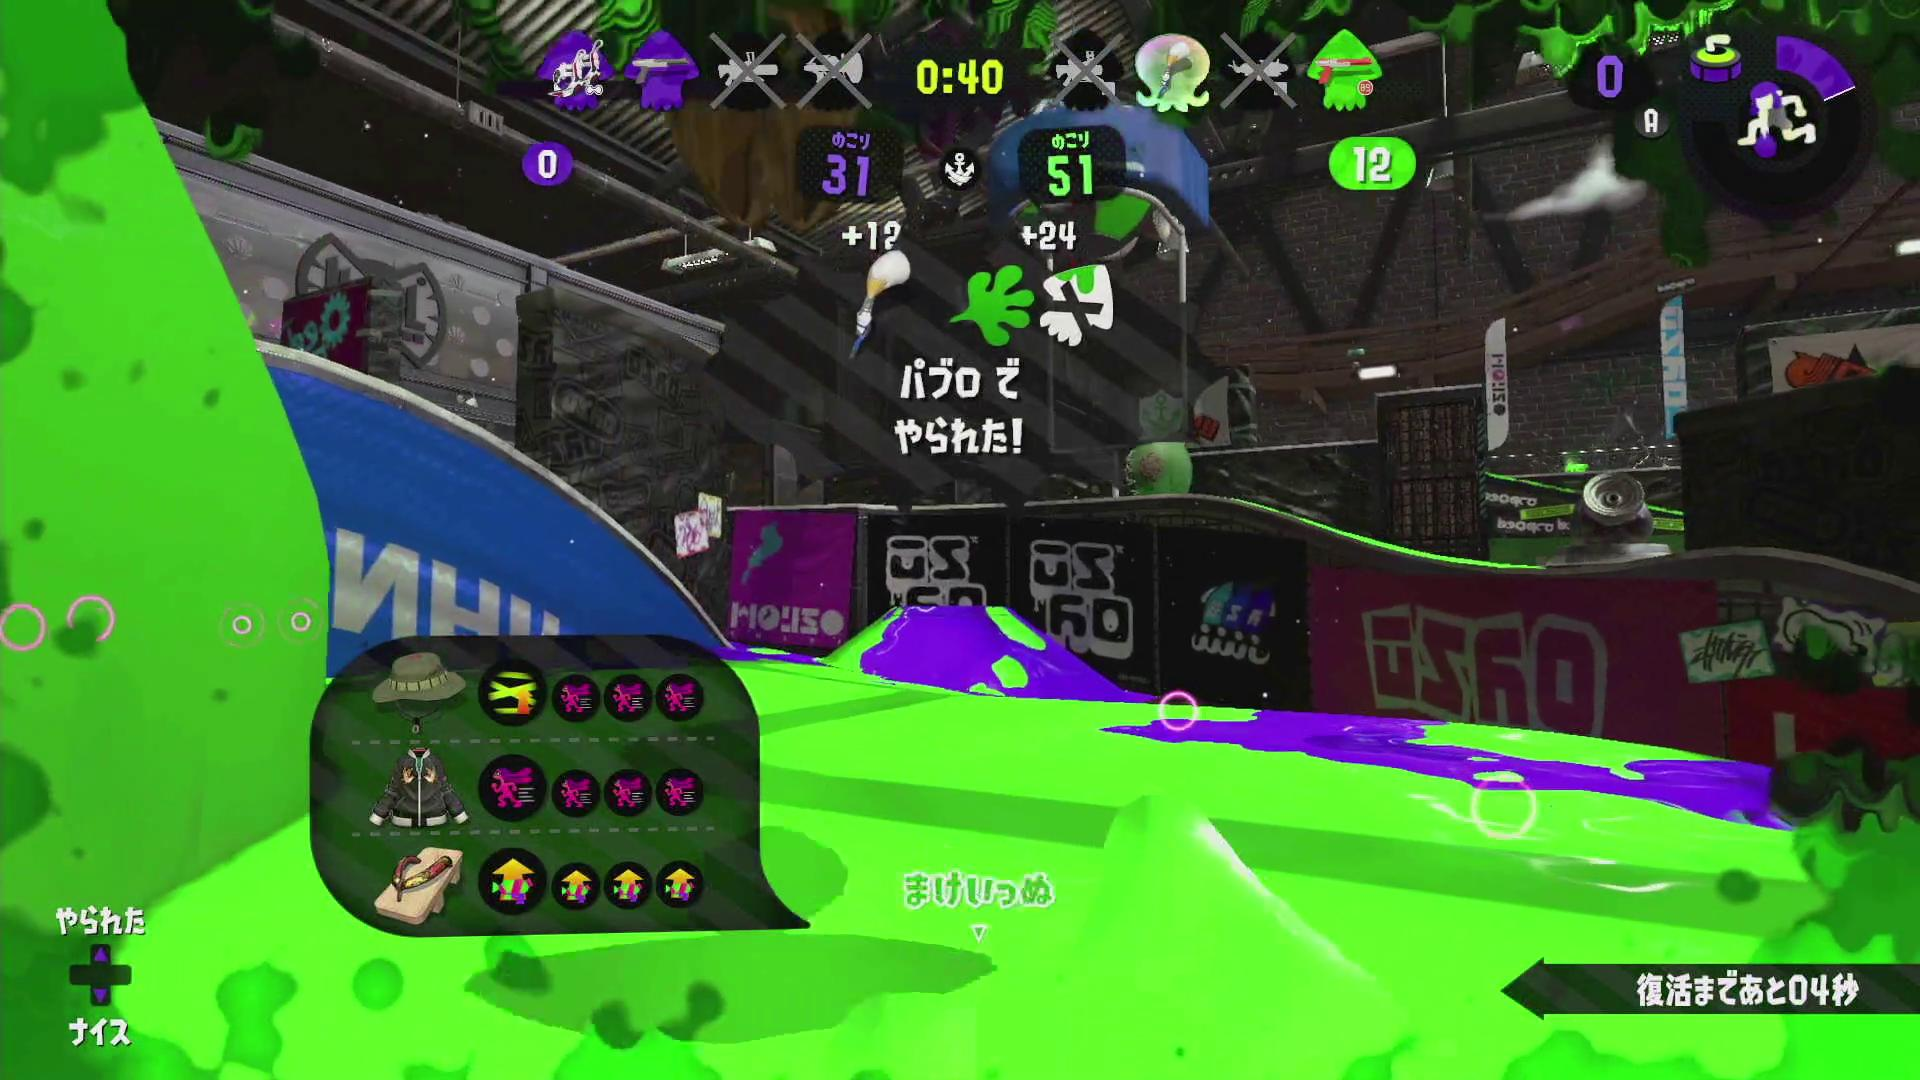

{'  ': {'position': ((0, 0), (1855, 962)), 'confidence': 95.0},
 '7': {'position': ((94, 989), (108, 1002)), 'confidence': 39.41291046142578},
 '1155266046': {'position': ((1637, 970), (1859, 1006)),
  'confidence': 54.33483123779297},
 '713': {'position': ((69, 1018), (132, 1046)),
  'confidence': 53.03218460083008}}

In [23]:
os.environ['TESSDATA_PREFIX'] = '../resources/fonts/'
img = cv2.imread(f"{SS_FILE_PATH}/in_battle/death2.png")
show(img)
extract_imageboxes(
    img,
    'spl'
)